## Artificial Intelligence - Week 1 Homework

### I. Linear Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Write a routine that loads a data file and returns a matrix X containing all xi as rows,
and a vector y containing all yi

In [2]:
def load_dataset(filename):
    x = []
    y = []
    with open(filename, 'r') as inputfile:
        for iline in inputfile:
            data = iline.strip('\n').split()
            # filling y
            y.append(float(data[-1]))
            # filling x
            x.append([float(xi) for xi in data[:-1]])
    X = np.asarray(x)
    Y = np.asarray(y)
    
    return X, Y

# testing
x1d, y1d = load_dataset('dataLinReg1D.txt')
x2d, y2d = load_dataset('dataLinReg2D.txt')

b) Write a routine that takes the raw X as input and returns a new X with a ’1’ pre-pended
to each row. This routine simply computes the linear features including the constant
’1’. This routine can later be replaced by others to work with non-linear features.

In [3]:
def linear_transform(X):
    return np.append(X, np.ones((X.shape[0],1)), axis=1)

# testing
x1d_appended = linear_transform(x1d)
# print(x1d_appended)

c) Write a routine that returns the optimal w from X and y - analytically, not by gradient
descent.

In [4]:
def ridge_regression(X, Y, lamb=1e-3):
    pre = np.linalg.inv(np.matmul(X.T, X)) + lamb * np.eye(X.shape[1])
    post = np.matmul(X.T, Y)
    return np.matmul(pre, post)

# testing
w = ridge_regression(x1d_appended, y1d)
print(w)

[ 0.60186676 -0.87951738]


d) Generate some test data points (along a grid) and collect them in a matrix Z. Apply
routine b) to compute features. Compute the predictions y = Zw (simple matrix
multiplication) on the test data and plot it.

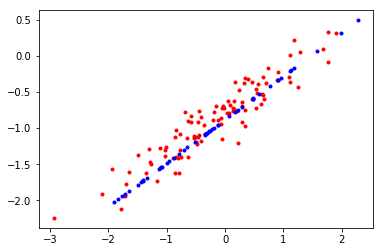

In [7]:
def plot_z_matrix(X, Y, count=50):
    Xi = linear_transform(X)
    w = ridge_regression(Xi, Y)
    Z = np.random.randn(count, 1)
    Zi = linear_transform(Z)
    Yz = np.matmul(Zi, w)
    
    plt.plot(X, Y, '.r')
    plt.plot(Z, Yz, '.b')

# testing on 1d
plot_z_matrix(x1d, y1d)

### II. Cross-validation

In [10]:
import math

def rbf(x, y, alp=1e-3):
    norm = np.linalg.norm((x-y))
    return math.exp(-(norm)/alp**2)
    

def rbf_transform(X, alp=1e-3):
    rbfX = np.zeros((X.shape[0], X.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            rbfX[i, j] = rbf(X[i,:], X[j,:], alp=alp)
            
    return rbfX

# testing
rx1d = rbf_transform(x1d)
    

In [22]:
def loss(X, Y, w, lamb):
    Yi = np.matmul(X, w)
    lse = 0.5 * np.linalg.norm(Yi - Y)**2
    ridge = lamb * np.linalg.norm(w)**2
    return lse + ridge
    

def cross_validate(X, Y, transform, folds=5, lamb=1e-3):
    N = X.shape[0]
    pn = math.ceil(N / folds)
    X_pieces = [X[i*pn:min((i+1)*pn,N),:] for i in range(folds)]
    Y_pieces = [Y[i*pn:min((i+1)*pn,N)] for i in range(folds)]
    
    Ws = []
    crossval_losses = []
    
    for i in range(folds):
        Xval = transform(X_pieces[i])
        Yval = Y_pieces[i]
        
        X_p = X_pieces[:]
        del X_p[i]
        Y_p = Y_pieces[:]
        del Y_p[i]
        
        Xtrain = transform(np.concatenate(X_p, axis=0))
        Ytrain = np.concatenate(Y_p, axis=0)
        
        w = ridge_regression(Xtrain, Ytrain)
        Ws.append(w)
        
        cross_loss = loss(Xval, Yval, w, lamb)
        crossval_losses.append(cross_loss)
        
    return np.mean(crossval_losses)

# testing
CVLoss = cross_validate(x1d, y1d, linear_transform)
print(CVLoss)
CVLoss = cross_validate(x1d, y1d, rbf_transform)
print(CVLoss)
    

0.43459999397904614


ValueError: shapes (20,20) and (80,) not aligned: 20 (dim 1) != 80 (dim 0)